In [61]:
#Load needed libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#Load data set in and check information
traffic = pd.read_csv(r"C:\Users\whift\Downloads\pd_collisions_details_datasd.csv", dtype = {'report_id':str})
traffic.info

<bound method DataFrame.info of        report_id            date_time              person_role  \
0         192016  2015-03-19 12:00:00  PARKED VEHICLE OCCUPANT   
1         190012  2015-03-24 03:05:00                   DRIVER   
2         191866  2015-03-27 23:56:00                   DRIVER   
3         185207  2015-07-06 11:45:00                   DRIVER   
4        1608987  2015-08-22 13:45:00                   DRIVER   
...          ...                  ...                      ...   
136251  25202751  2025-05-20 07:29:40                      NaN   
136252  25021516  2025-06-01 16:02:00                      NaN   
136253  25203212  2025-06-13 11:54:33                      NaN   
136254  25203223  2025-06-14 01:50:00                      NaN   
136255  25203229  2025-06-14 11:15:00                      NaN   

       person_injury_lvl person_veh_type          veh_type veh_make veh_model  \
0                    NaN             NaN        AUTOMOBILE     FORD       NaN   
1            

In [62]:
#Quick overview of data set
traffic.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,192016,2015-03-19 12:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,AUTOMOBILE,FORD,NaN,622,5200,...,ROAD,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,190012,2015-03-24 03:05:00,DRIVER,VISABLE,NaN,NaN,NISSAN,ALTIMA,626,1000,...,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,2,0,NaN
2,191866,2015-03-27 23:56:00,DRIVER,PAIN,NaN,LIGHT DUTY TRUCK,FORD,F150,613,2800,...,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN
3,185207,2015-07-06 11:45:00,DRIVER,NaN,NaN,NaN,FORD,MUSTANG,813,2800,...,BOULEVARD,,,,20002(A),VC,HIT AND RUN,0,0,MISDEMEANOR
4,1608987,2015-08-22 13:45:00,DRIVER,NaN,NaN,TRAILER,YAMAHA,NaN,999,0,...,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,1,0,NaN


<span style="color: white"> Data Filtering </span>

In [63]:
#Excludes the charges that has nothing to do with the bicyclist being the one at fault
exclude_charges = [
    'BICYCLE HEADLIGHT/REFLECTOR VIOL (I)',
    'BICYCLE MUST STOP BEFORE INTERSECTION AT RED LIGHT (I)',
    'BICYCLE OPERATORS SHALL OBEY VEHICLE LAWS (I)',
    'BICYCLIST SHALL OBEY SIGNAL AND YIELD TO LAWFUL TRAFFIC (I)',
    'BIKE LANE - UNSAFE MOVEMENT (I)',
    'BRAKES REQUIRED ON BICYCLE (I)',
    'CARRY ARTCL:PREV AT LEAST ONE HAND ON BICYCLE HANDLEBARS (I)',
    'DISOBEY CONSTRUCTION WARNING DEV (I)',
    'DRVG ON SIDEWALK (I)',
    'FAIL TO RIDE BICYCLE:RIGHT EDGE OF ROADWAY (I)',
    'FAILED TO STOP FOR STOP SIGN (I)',
    'FAILURE TO MERGE INTO BICYCLE LANE BEFORE MAKING RIGHT TURN (I)',
    'LANE USAGE:BICYCLIST FAILURE TO RIDE IN BIKE LANE (I)',
    'LANE USAGE:OPERATING BICYCLE ON WRONG SIDE OF ROAD (I)',
    'MOTORIZED BICYCLE: SAFETY/EQUIPMENT REQUIREMENTS (I)',
    'MUST WEAR HELMET WHILE OPERATE CLASS 3 ELECTRIC BICYCLE (I)',
    'NO BICYCLE LIGHT (I)',
    'OPERATE MOTORIZED BIKE IN BIKE LANE SAFELY (I)',
    'PARKING BICYCLE ON SIDEWALK/PEDESTRIAN PATH (I)',
    'RED REFLECTOR ON REAR OF BIKE REQUIRED (I)',
    'RIDING BICYCLE UNDER INFLUENCE OF ALCOHOL AND/OR DRUGS(IBR 90E)',
    'SIGNAL LIGHTS:CIRCULAR GREEN (I)',
    'SIGNAL LIGHTS:CIRCULAR RED (I)',
    'SIGNAL LIGHTS:FLASHING RED (I)',
    'SIGNAL LIGHTS:PEDESTRIAN CIRCULAR RED OR RED ARROW (I)',
    'SIGNAL LIGHTS:RED ARROW (I)',
    'SIGNAL LIGHTS:RIGHT TURN ON RED (I)',
    'SUDDEN STOP W/O SIGNALING (I)',
    'TURNS:ILLEGAL U-TURN IN A BUSINESS DISTRICT (I)',
    'TURNS:ILLEGAL U-TURN IN A RES DISTRICT (I)',
    'TURNS:ILLEGAL U-TURN OBSTRUCTED VIEW (I)',
    'TURNS:IMPROPER LEFT HAND TURN (I)',
    'TURNS:IMPROPER RIGHT HAND TURN (I)',
    'TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)',
    'UNSAFE START ON HWY (I)',
    'UNSAFE TURNING MOVEMENT (I)'
]

traffic = traffic[~traffic['charge_desc'].isin(exclude_charges)]

#Convert the column date_time into datetime for easier time filtering
traffic = traffic.rename(columns = {'date_time':'date'})
traffic['date'] = pd.to_datetime(traffic['date'], format = '%Y-%m-%d %H:%M:%S')

# Keep only the month we do not need the time stamps for now
traffic['date'] = traffic['date'].dt.date
#Converts back to date time since running the line above makes it not a datetime 64 object anymore
traffic['date'] = pd.to_datetime(traffic['date'], format = '%Y-%m-%d')

#Filter the years 2020 through 2025 only
traffic_2020_2025 = traffic[(traffic['date'].dt.year >= 2020) & (traffic['date'].dt.year <= 2025)]

#Filter data to bicyclist accidents, set with injury greater than 1 to focus on crashes and avoid events that are just citations
bike_accidents = traffic_2020_2025[(traffic_2020_2025['person_role'] == 'BICYCLIST') & (traffic_2020_2025['injured'] >= 1) ]

#Now we drop any duplicates because if different people were involved in the same accident but have the same report_id then we should just count
#The first instance because it counts as one whole accident.
bike_accidents = bike_accidents.drop_duplicates(subset = ['report_id', 'date']).reset_index(drop = True)


#See a good amount of the new filtered data
bike_accidents.head(30)


,report_id,date,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,20200140,2020-01-06,BICYCLIST,SEVERE,NaN,BICYCLE,GIANNINI,NaN,531,1900,...,DRIVE,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,NaN
1,20200152,2020-01-07,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,521,1400,...,,,,,22517,VC,UNSAFE OPENING OF VEH DOOR (I),1,0,NaN
2,20200153,2020-01-07,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,243,0,...,ROAD,,PADGETT,STREET,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN
3,20200237,2020-01-10,BICYCLIST,VISABLE,NaN,BICYCLE,FUJI ROBBT JR.,NaN,523,700,...,AVENUE,,,,21657,VC,LANE USAGE:DISOBEY DESIGNATED TRAFFIC DIRECTIO...,1,0,NaN
4,20200338,2020-01-13,BICYCLIST,PAIN,NaN,BICYCLE,GIANNINI,NaN,614,4700,...,BOULEVARD,,,,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN
5,20002498,2020-01-14,BICYCLIST,NaN,NaN,BICYCLE,GT,NaN,511,3600,...,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,1,0,NaN
6,20200399,2020-01-16,BICYCLIST,VISABLE,NaN,BICYCLE,NaN,NaN,115,0,...,AVENUE,,NOBEL,DRIVE,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,1,0,NaN
7,20200444,2020-01-17,BICYCLIST,PAIN,NaN,BICYCLE,"TREK, INC.",NaN,115,4600,...,DRIVE,,,,21800A,VC,RIGHT-OF-WAY:INTERSECTION,1,0,NaN
8,20200445,2020-01-17,BICYCLIST,VISABLE,NaN,BICYCLE,FUJI ROBBT JR.,NaN,521,600,...,AVENUE,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,FELONY
9,20200527,2020-01-22,BICYCLIST,VISABLE,NaN,BICYCLE,FUJI ROBBT JR.,NaN,931,3900,...,BOULEVARD,,,,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN


In [64]:
#Heres a list of the charges that are deemed as accidents and not the bicyclist fault
bike_accidents.groupby('charge_desc').nunique().reset_index()[['charge_desc']]


,charge_desc
0,"DRIVE OVER, UPON, OR ACROSS DIVIDING SECTION O..."
1,DRIVER TO EXERCISE DUE CARE FOR THE SAFETY OF ...
2,DRVG WITHOUT VALID DRVR'S LIC (I)
3,DUI ALCOHOL (M)
4,DUI ALCOHOL:CAUSING BODILY INJURY (F)
5,DUI ALCOHOL:CAUSING BODILY INJURY (M)
6,EVADE PEACE OFCR WITH WANTON DISREGARD FOR SAF...
7,FAIL TO OBEY PEACE OFFICER:LAWFUL ORDER OR INS...
8,FOLLOWING TOO CLOSELY (I)
9,HIT AND RUN RESULTING IN DEATH OR INJURY(IBR 90Z)


<span style="color: white"> Start of temporal Analysis </span>

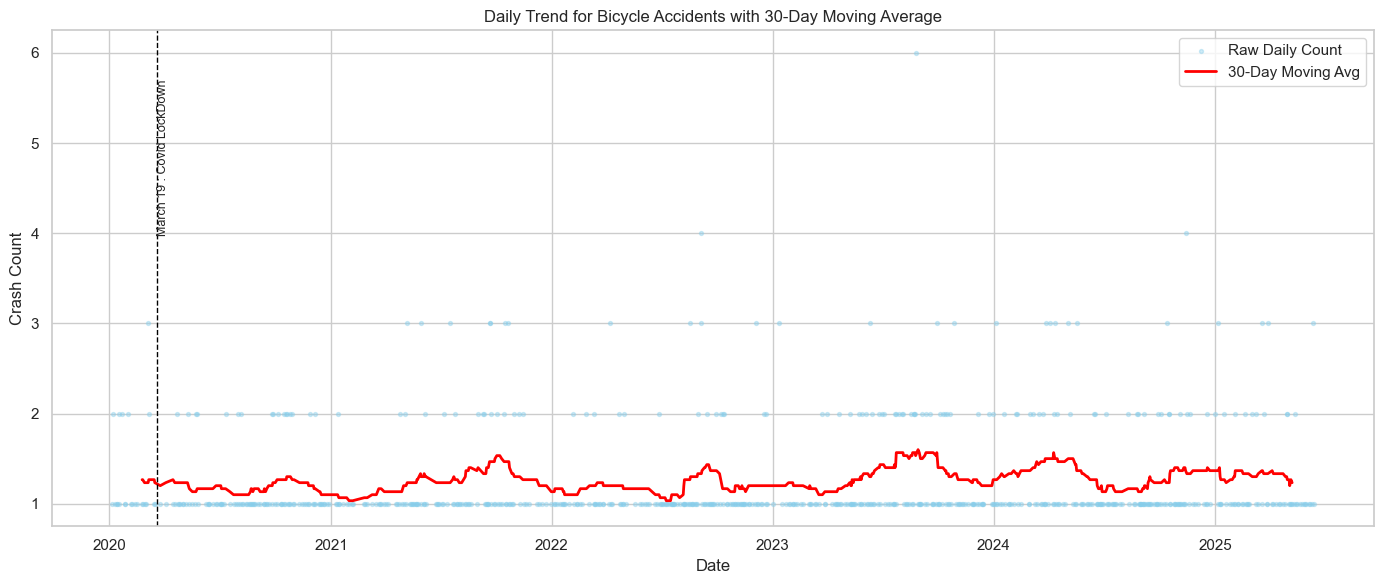

In [65]:
# Group by full date (no timestamp assumed)
daily_counts = bike_accidents.groupby('date').size().reset_index(name='count')

# Sort by date just in case
daily_counts = daily_counts.sort_values('date')

# 30-day moving average
daily_counts['30d_avg'] = daily_counts['count'].rolling(window=30, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(daily_counts['date'], daily_counts['count'], color='skyblue', alpha=0.4, s=8, label='Raw Daily Count')
plt.plot(daily_counts['date'], daily_counts['30d_avg'], color='red', linewidth=2, label='30-Day Moving Avg')

# Optional vertical annotation
plt.axvline(pd.to_datetime('2020-03-19'), color='black', linestyle='--', linewidth=1)
plt.text(pd.to_datetime('2020-03-19'), max(daily_counts['count']) * 0.95, 'March 19 : Covid LockDown',
         rotation=90, verticalalignment='top', fontsize=9)

# Titles and labels
plt.title('Daily Trend for Bicycle Accidents with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.tight_layout()
plt.show()


<span style="color: white"> The scatter plot above is fitted with a smoothing line of a  30 day moving average. Peaks in 2023 and 2024 has been higher than the previous years this could be a sign of an increase in bike accidents throughout the year. There seems to be peaks in the middle of the months in the summer meaning there might be monthly trends(we will look at this closely later on).    text</span>

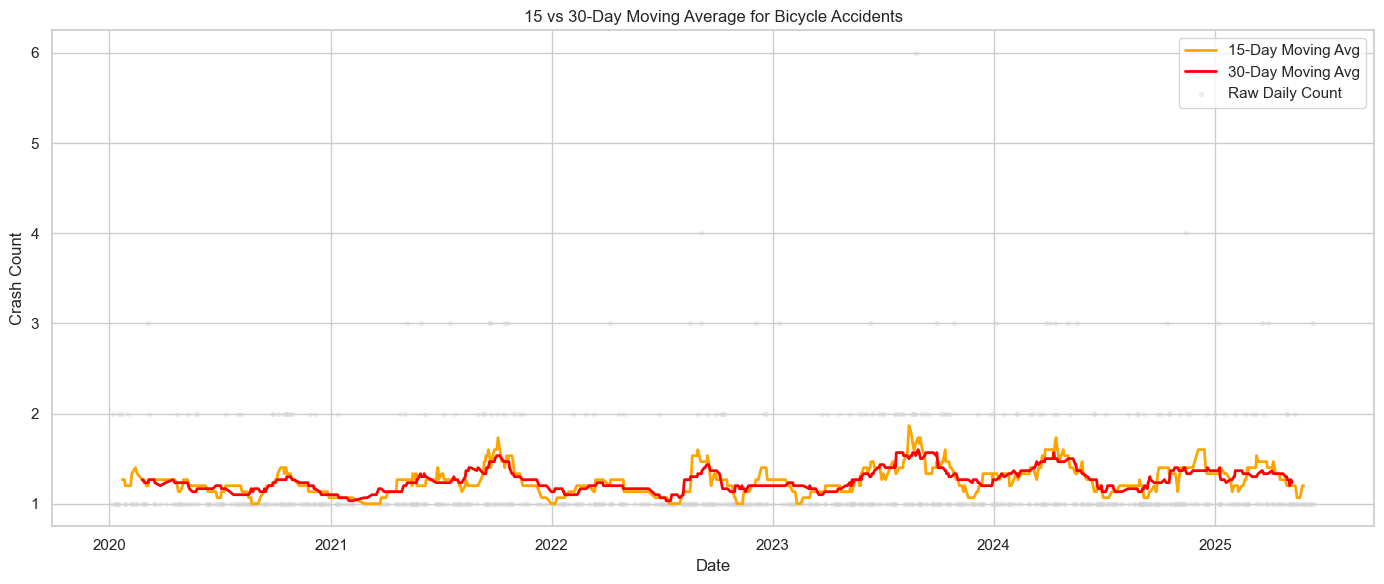

In [66]:
# Group by full date
daily_counts = bike_accidents.groupby('date').size().reset_index(name='count')

# Sort by date
daily_counts = daily_counts.sort_values('date')

# Calculate moving averages
daily_counts['15d_avg'] = daily_counts['count'].rolling(window=15, center=True).mean()
daily_counts['30d_avg'] = daily_counts['count'].rolling(window=30, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_counts['date'], daily_counts['15d_avg'], color='orange', label='15-Day Moving Avg', linewidth=2)
plt.plot(daily_counts['date'], daily_counts['30d_avg'], color='red', label='30-Day Moving Avg', linewidth=2)

# Optional raw data scatter for reference
plt.scatter(daily_counts['date'], daily_counts['count'], color='lightgrey', alpha=0.3, s=8, label='Raw Daily Count')

# Titles and labels
plt.title('15 vs 30-Day Moving Average for Bicycle Accidents')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.tight_layout()
plt.show()


<span style="color: white"> Here is a graph comparing a 15 day moving average vs a 30 day moving average. A 15 day moving average is more sensitve with changes making the peaks more exaggerated, but results in more noise. The huge peaks in the middle of the months are now easier seems easier to spot.  </span>

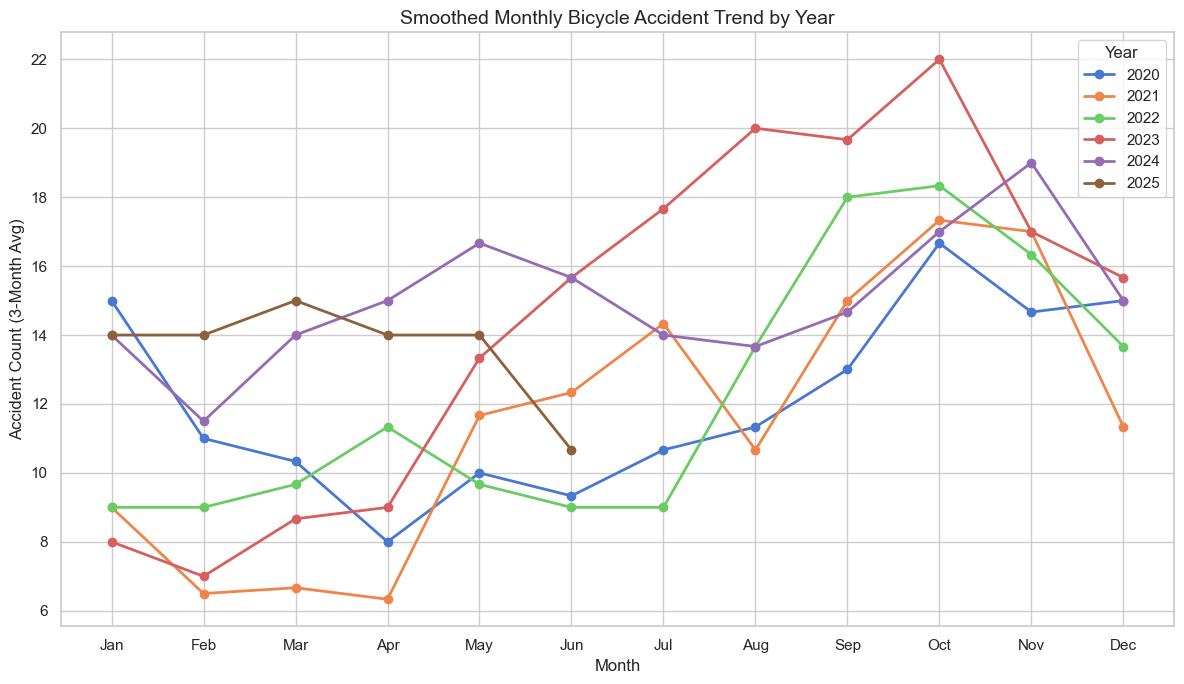

In [67]:
#Remove the days in the dates
year_month = bike_accidents.copy()
year_month['date'] = year_month['date'].dt.to_period('M')

# Calculate monthly counts
year_month['year'] = year_month['date'].dt.year
year_month['month'] = year_month['date'].dt.month
monthly_counts = year_month.groupby(['year', 'month']).size().reset_index(name='counts')

# Apply 3-month rolling average
monthly_counts['rolling'] = monthly_counts.groupby('year')['counts'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid", palette="muted")

for year, group in monthly_counts.groupby('year'):
    plt.plot(group['month'], group['rolling'], marker='o', linewidth=2, label=str(year))

plt.title('Smoothed Monthly Bicycle Accident Trend by Year', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Accident Count (3-Month Avg)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()



<span style="color: white">  2023 seems to be the year with the biggest peak in accidents compared to the rest of the year. All of the years except 2025 of course have huge peakse during the summer this is because this are the times when people are more active. We have spotted our monthly trend with huge peaks in the summer. We can also see that the beggining of the year seems to dip meaning it has the lowest amount of accidents.   text</span>

<span style="color: white">  End of temporal Analysis    text</span>

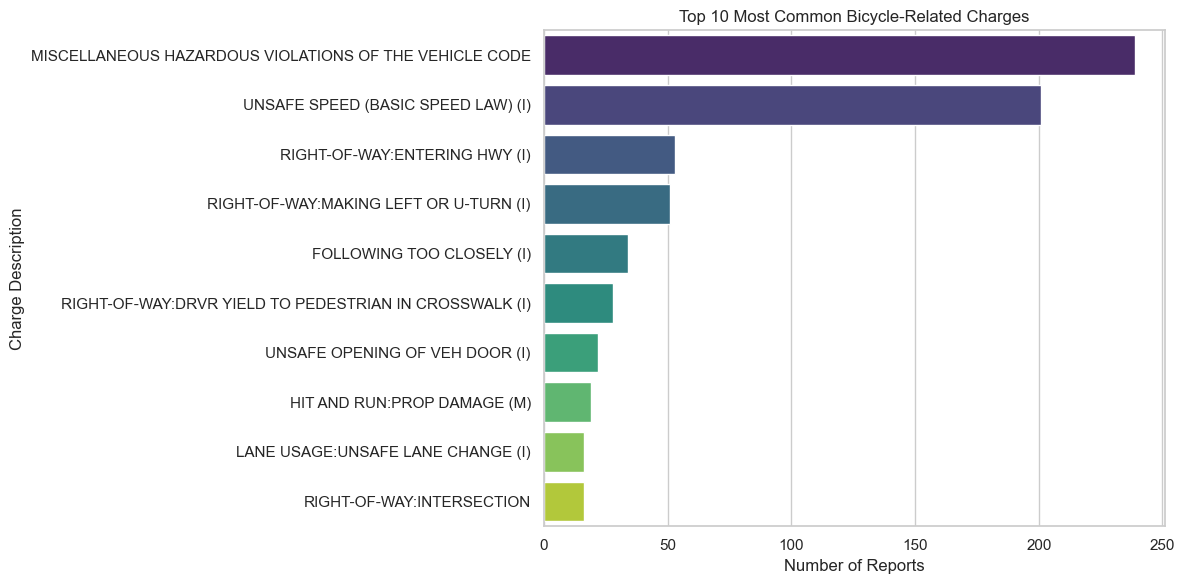

In [68]:
#Now we want to see the top 10 charges in these accidents
charge_count = bike_accidents.groupby('charge_desc')['report_id'].nunique().reset_index()
charge_count = charge_count.rename(columns={'report_id': 'count'})
#Sort to top 10 
top_charges = charge_count.sort_values(by = 'count', ascending = False).head(10)

#Create Bar plot for top 10 most common bicycle charges
plt.figure(figsize=(12, 6))
sns.barplot(data=top_charges, x='count', y='charge_desc',hue ='charge_desc', palette='viridis', legend = False)
plt.title('Top 10 Most Common Bicycle-Related Charges')
plt.xlabel('Number of Reports')
plt.ylabel('Charge Description')
plt.tight_layout()
plt.show()

<span style="color: white"> Just a reminder that within these offenses at least 1 was injured. </span>

In [69]:
#On the address_no_primary column some has a input as 0 which does not make sense so we just replace it with a blank space instead
bike_accidents['address_no_primary'] = bike_accidents['address_no_primary'].replace(0, '')

#Combine address column to make a valid address
bike_accidents['address'] = bike_accidents[
    ['address_no_primary', 'address_pd_primary', 'address_road_primary',
     'address_sfx_primary']
].apply(lambda x: ' '.join(
    x.dropna().astype(str).replace('nan', '').str.strip()
), axis=1).str.replace(r'\s+', ' ', regex=True).str.strip()

bike_accidents['address'] = bike_accidents['address'] + ', San Diego, CA'

bike_accidents

,report_id,date,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,address
0,20200140,2020-01-06,BICYCLIST,SEVERE,NaN,BICYCLE,GIANNINI,NaN,531,1900,...,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,NaN,"1900 PERSHING DRIVE, San Diego, CA"
1,20200152,2020-01-07,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,521,1400,...,,,,22517,VC,UNSAFE OPENING OF VEH DOOR (I),1,0,NaN,"1400 BROADWAY, San Diego, CA"
2,20200153,2020-01-07,BICYCLIST,PAIN,NaN,BICYCLE,NaN,NaN,243,,...,,PADGETT,STREET,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN,"MIRAMAR ROAD, San Diego, CA"
3,20200237,2020-01-10,BICYCLIST,VISABLE,NaN,BICYCLE,FUJI ROBBT JR.,NaN,523,700,...,,,,21657,VC,LANE USAGE:DISOBEY DESIGNATED TRAFFIC DIRECTIO...,1,0,NaN,"700 05TH AVENUE, San Diego, CA"
4,20200338,2020-01-13,BICYCLIST,PAIN,NaN,BICYCLE,GIANNINI,NaN,614,4700,...,,,,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN,"4700 WEST POINT LOMA BOULEVARD, San Diego, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,25203134,2025-06-09,BICYCLIST,MINOR,NaN,BICYCLE,GHOS,NaN,325,7100,...,,,,21703,VC,FOLLOWING TOO CLOSELY (I),2,0,NaN,"7100 NAVAJO ROAD, San Diego, CA"
860,25203177,2025-06-11,BICYCLIST,MINOR,NaN,BICYCLE,NaN,NaN,124,600,...,,,,21658A,VC,LANE USAGE:UNSAFE LANE CHANGE (I),1,0,NaN,"600 PEARL STREET, San Diego, CA"
861,25203183,2025-06-11,BICYCLIST,MINOR,NaN,BICYCLE,NaN,NaN,512,700,...,,,,21460A,VC,LANE USAGE:VEH CROSS DOUBLE SOLID LINE (I),2,0,NaN,"700 CESAR E CHAVEZ PARKWAY, San Diego, CA"
862,25203184,2025-06-11,BICYCLIST,MINOR,NaN,BICYCLE,AVENTON,NaN,614,1800,...,,,,21801A,VC,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I),1,0,NaN,"1800 SUNSET CLIFFS BOULEVARD, San Diego, CA"


In [70]:
#Check the frequency of bike accident reports depending on address
danger_address = bike_accidents.groupby(['address'])['report_id'].size().sort_values( ascending = False).reset_index().head(10)
#Just to see what the address with the most frequent accident had as a charge description
bike_accidents[bike_accidents['address'] == danger_address['address'][0]][['charge_desc']]

,charge_desc
238,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...
358,RIGHT-OF-WAY:MAKING LEFT OR U-TURN (I)
507,UNSAFE SPEED (BASIC SPEED LAW) (I)
565,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...


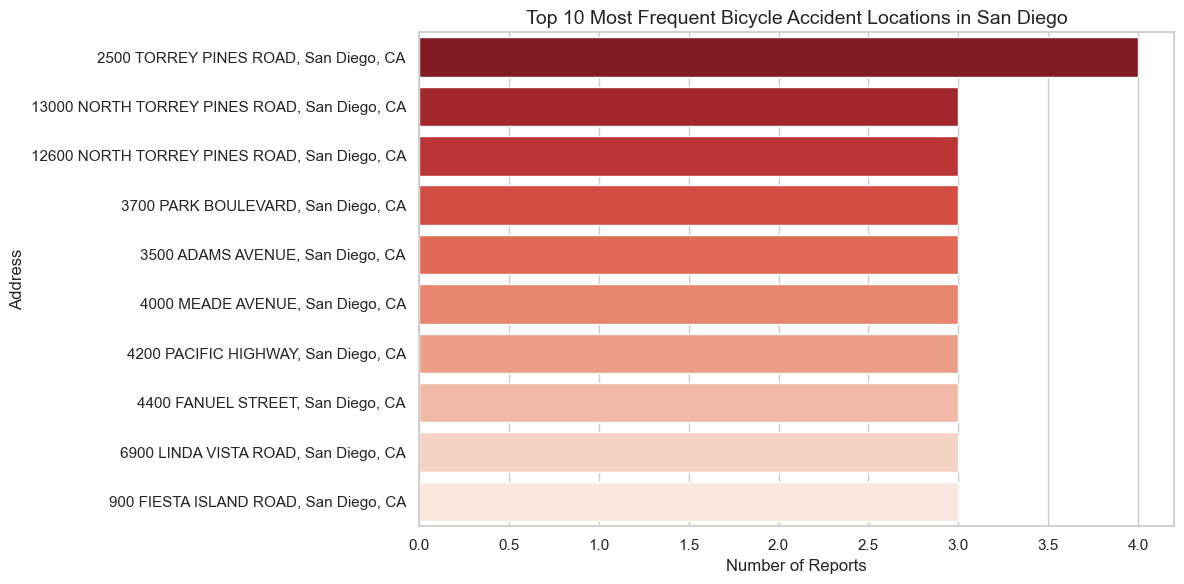

In [71]:
# Create a copy to add hue values (same as y to simulate color intensity per bar)
danger_address_plot = danger_address.copy()
danger_address_plot['hue'] = danger_address_plot['address']  # Dummy hue to apply palette

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=danger_address_plot,
    x='report_id',
    y='address',
    hue='hue',
    dodge=False,
    palette='Reds_r',
    legend=False
)

plt.title('Top 10 Most Frequent Bicycle Accident Locations in San Diego', fontsize=14)
plt.xlabel('Number of Reports')
plt.ylabel('Address')
plt.tight_layout()
plt.show()


<span style="color: white"> Torrey Pines road has the most reports from the year 2020-2025 so it is best to stay cautious in that area. In the top 10 torrey pines occupoes 3 out of the 10 spots. </span>

In [72]:
#For Future use convert the current data frame bike_accidents into a csv file.
import os
bike_accidents.to_csv('cleaned_bike_accidents.csv', index = False)
os.getcwd()

'C:\\Users\\whift\\PycharmProjects\\Traffice_Collisions'